In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from surprise import Dataset,Reader
from surprise import KNNBasic,accuracy
from surprise.model_selection import train_test_split

In [3]:
df = pd.read_csv('./data/rating_complete.csv', usecols=range(3), header=0, names=('user', 'item', 'rating'), nrows=2000000)

In [12]:
from tqdm import tqdm

In [14]:
res = []
for n in tqdm([250000*n for n in range(1,9)]):
    df_small = df.loc[:n-1,:]
    reader = Reader(rating_scale=(1, 10))
    data = Dataset.load_from_df(df_small, reader)

    trainset, testset=train_test_split(data, test_size=0.2)

    #user-based Cosine
    sim_options = {
        "user_based": True,  # compute  similarities between users
        "name":"cosine"
    }

    algo = KNNBasic(sim_options=sim_options,k=40, min_k=5, verbose=False) #default value of k is 40
    algo.fit(trainset)
    predictions = algo.test(testset)
    # accuracy.rmse(predictions)
    # accuracy.mae(predictions)
    res.append([accuracy.rmse(predictions),accuracy.mae(predictions)])

  0%|          | 0/8 [00:00<?, ?it/s]

 12%|█▎        | 1/8 [00:21<02:28, 21.17s/it]

RMSE: 1.5709
MAE:  1.1826


 25%|██▌       | 2/8 [01:42<05:39, 56.57s/it]

RMSE: 1.5221
MAE:  1.1499


 38%|███▊      | 3/8 [04:44<09:28, 113.78s/it]

RMSE: 1.5193
MAE:  1.1490


 50%|█████     | 4/8 [09:55<12:45, 191.50s/it]

RMSE: 1.4948
MAE:  1.1310
RMSE: 1.4966


 62%|██████▎   | 5/8 [17:42<14:33, 291.00s/it]

MAE:  1.1328
RMSE: 1.4999


 75%|███████▌  | 6/8 [29:10<14:11, 425.89s/it]

MAE:  1.1353
RMSE: 1.5221


 88%|████████▊ | 7/8 [47:06<10:38, 638.45s/it]

MAE:  1.1516
RMSE: 1.5209


100%|██████████| 8/8 [1:11:18<00:00, 534.87s/it]

MAE:  1.1485


In [37]:
pd.DataFrame([(x,list(y)[0],list(y)[1]) for x,y in zip([250000*n for n in range(1,9)],res)],columns=['iterations','RMSE','MAE'])

,iterations,RMSE,MAE
0,250000,1.570909,1.182643
1,500000,1.522146,1.149893
2,750000,1.519306,1.149006
3,1000000,1.494791,1.131002
4,1250000,1.496597,1.132812
5,1500000,1.499884,1.135305
6,1750000,1.522090,1.151557
7,2000000,1.520888,1.148504


<AxesSubplot:>

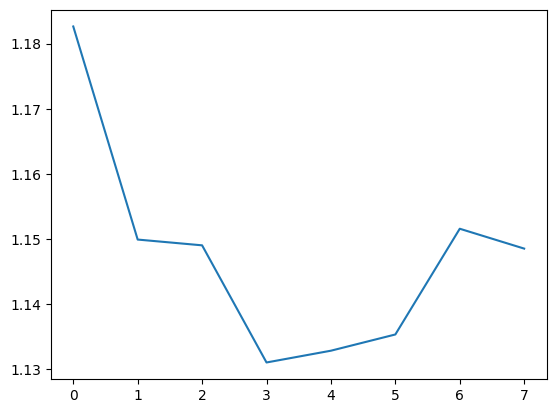

In [40]:
pd.DataFrame([(x,list(y)[0],list(y)[1]) for x,y in zip([250000*n for n in range(1,9)],res)],columns=['iterations','RMSE','MAE']).MAE.plot()

<AxesSubplot:>

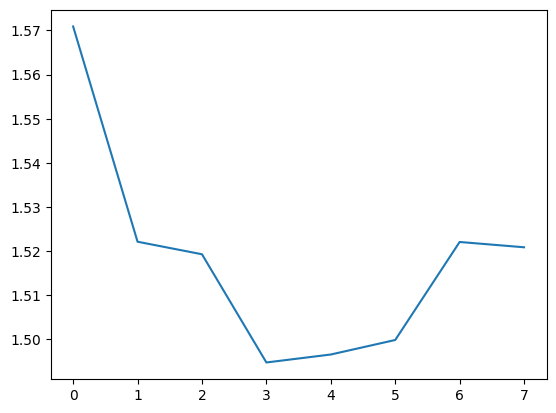

In [39]:
pd.DataFrame([(x,list(y)[0],list(y)[1]) for x,y in zip([250000*n for n in range(1,9)],res)],columns=['iterations','RMSE','MAE']).RMSE.plot()

In [ ]:
#user-based Cosine
sim_options = {
    "user_based": True,  # compute  similarities between users
    "name":"cosine"
}

# # With K=20 neighbors
# algo = KNNBasic(sim_options=sim_options,k=20, min_k=5) #default value of k is 40
 
# #cv=cross_validate(algo, data, measures=["RMSE", "MAE"], cv=5, return_train_measures=True, verbose=True)
# algo.fit(trainset) # compute similarities
# predictions = algo.test(testset)
# accuracy.rmse(predictions)
# accuracy.mae(predictions)

# Let us make K change K=40
algo = KNNBasic(sim_options=sim_options,k=40, min_k=5) #default value of k is 40
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)
accuracy.mae(predictions)